## Z-Spread 

Author: Will Carpenter

Date:   April 6th, 2024

A comprehensive Python notebook to create a spot interest rate curve and calculate bond Z-spreads, among other pricing metrics. This notebook leverages custom Python modules (see importing and project folder for all source code).

Data is currently based on Treasury Par Yield Rates from 10/19/2022 through 3/8/2024. This can be updated at anytime using the data publically available online. 

In [1]:
# Import
import pandas as pd
import numpy as np
# Custom modules
import mortgage_cash_flow as mbs
import bond_price as px
import spot_rate_bootstrap as boot 
import z_spread as pricing
import charts as chrts

Obtain U.S. Treasury Par-Yield Data

In [2]:
# Importing data available on Github  
tsy      = pd.read_csv("https://raw.githubusercontent.com/wrcarpenter/Z-Spread/main/Data/daily-treasury-rates.csv", header=0)
head     = pd.read_csv("https://raw.githubusercontent.com/wrcarpenter/Z-Spread/main/Data/daily-treasury-spot-header.csv")
tsy_cols = list(tsy.columns.values)
cols     = list(head.columns.values)

Interpolate Semi-Annual Par Yield Rates

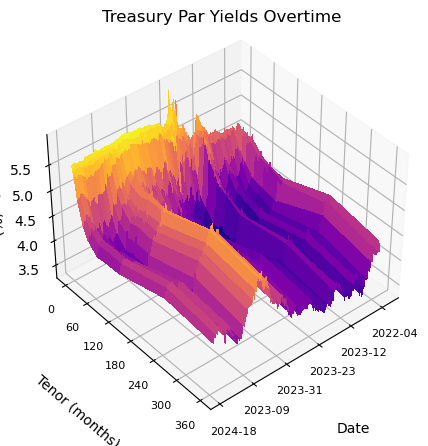

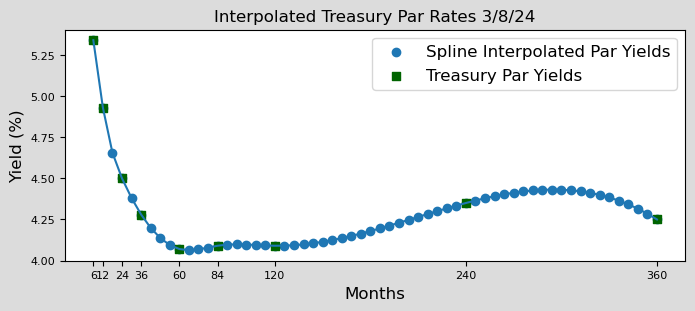

In [3]:
# Semi-annual interpolation 
ylds = boot.interpolate_yields(tsy, head)
# 3D visualization of yields
chrts.tsy_rate_surface(tsy, 40, 50, 5,7)
chrts.interp_tsy_yld_plot(ylds, tsy_cols, 8, 3)

Boostrap Treasury Yield Data to Create Spot Rate Curve

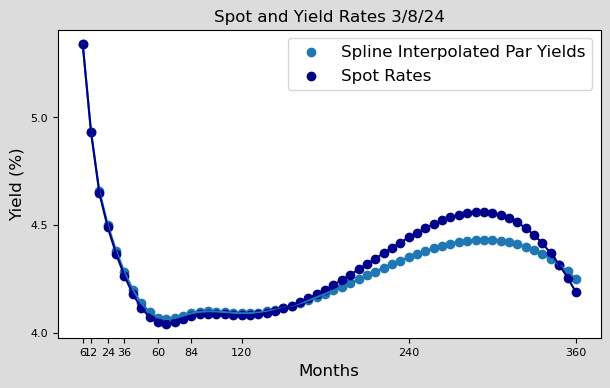

In [4]:
# Run module
spots         = boot.spot_rate_bootstrap(ylds, tsy, head)
spots_monthly = boot.spot_rates_monthly(spots)
# Charting
chrts.spot_rate_curve(ylds, tsy_cols, spots, 7, 4)

Generate Mortgage Cashflows

In [5]:
# Define cashflows with various coupons and prepayment speeds
cf_1 = mbs.cash_flow('03/29/2024', 8.50, 360, 360, 240, 0, 54, 12, 'CPR', 1000000)
cf_2 = mbs.cash_flow('03/29/2024', 6.50, 360, 360, 240, 0, 54,  7, 'CPR', 1000000)
cf_3 = mbs.cash_flow('03/29/2024', 3.50, 360, 360, 240, 0, 54,  5, 'CPR', 1000000)
cf_4 = mbs.cash_flow('03/29/2024', 1.50, 360, 360, 240, 0, 54,  2, 'CPR', 1000000)
# Printing outputs for WAL
print("Cash Flow 1 WAL:", mbs.wal('3/29/2024', cf_1))
print("Cash Flow 2 WAL:", mbs.wal('3/29/2024', cf_2))
print("Cash Flow 3 WAL:", mbs.wal('3/29/2024', cf_3))
print("Cash Flow 4 WAL:", mbs.wal('3/29/2024', cf_4))


Cash Flow 1 WAL: 6.721973892945618
Cash Flow 2 WAL: 9.253809420779831
Cash Flow 3 WAL: 10.082086655085709
Cash Flow 4 WAL: 12.00932717873302


Calculating Mortgage Prices
